# Prosjekt i PY1010
## Support dashboard

## Del a) Lese inn data fra Excel og lagre i array 

In [87]:
%reset -f
# importerer bibiliotek 
import pandas as pd

# lese inn excel-filen
df_orginal = pd.read_excel("support_uke_24.xlsx")

# sjekk av 10 første oppføringene i filen
# print(df.head(10))

# lage arrey
u_dag = df_orginal["Ukedag"].tolist()
kl_slett = df_orginal["Klokkeslett"].tolist()
varighet = df_orginal["Varighet"].tolist()
score = df_orginal["Tilfredshet"].tolist()

# sjekk av 5 første oppføringene i arrey
print(u_dag[:5], kl_slett[:5], varighet[:5], score[:5])



['Mandag', 'Mandag', 'Mandag', 'Mandag', 'Mandag'] ['08:04:16', '08:04:53', '08:06:31', '08:11:21', '08:20:46'] ['00:07:12', '00:02:49', '00:08:36', '00:04:34', '00:07:38'] [nan, 6.0, nan, nan, nan]


## Del b) Finner antall hendvendelser pr ukedag visualisert i et søylediagram

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mandag'),
  Text(1, 0, 'Tirsdag'),
  Text(2, 0, 'Onsdag'),
  Text(3, 0, 'Torsdag'),
  Text(4, 0, 'Fredag')])

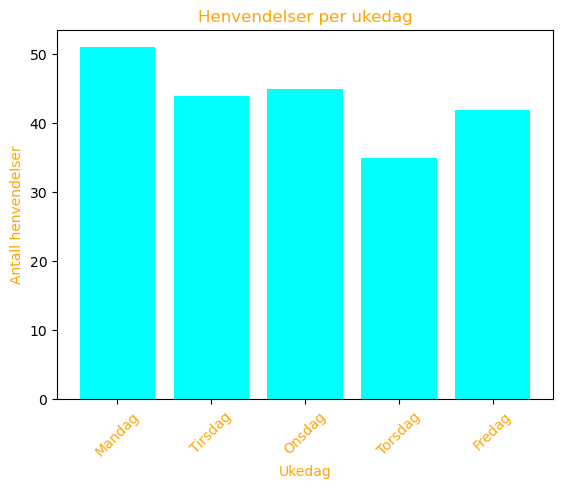

In [89]:
import matplotlib.pyplot as plt

# lager dictionary
ant_hendelser_pr_dag = {dag: u_dag.count(dag) for dag in set(u_dag)}

# skriver ut antall hendelser pr dag
# print(ant_hendelser_pr_dag)

# skrive ut som tabell 
df = pd.DataFrame(list(ant_hendelser_pr_dag.items()), columns=["Ukedag", "Antall henvendelser"])
# print(df)

# Sortere ukedager i ønsket rekkefølge
ukedager_rekkefolge = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag", "Lørdag", "Søndag"]

df["Ukedag"] = pd.Categorical(df["Ukedag"], categories = ukedager_rekkefolge, ordered = True)
df = df.sort_values("Ukedag")

# Lage søylediagram
plt.bar(df["Ukedag"], df["Antall henvendelser"], color = "cyan")
plt.xlabel("Ukedag", color = "orange")
plt.ylabel("Antall henvendelser", color = "orange")
plt.title("Henvendelser per ukedag", color = "orange")
plt.xticks(rotation=45, color = "orange")



## Del c) Finner minste og lengste samtaletid

In [91]:

min_samtaletid = min(varighet)
max_samtaletid = max(varighet)

# skriver ut minimum og maksimum samtaletid
print(f"Minste  samtaletid: {min_samtaletid} minutter")
print(f"Lengste samtaletid: {max_samtaletid} minutter")


Minste  samtaletid: 00:00:59 minutter
Lengste samtaletid: 00:11:28 minutter


## Del d) Finner gjenomsnitlig samtaletid

In [93]:
kolonne_varighet = "Varighet"

# Fjerner rader med manglende data i samtalevarighet
df_clean = df_orginal.dropna(subset=[kolonne_varighet]).copy()

# Konverter 'Varighet' til timedelta
df_clean[kolonne_varighet] = pd.to_timedelta(df_clean[kolonne_varighet], errors="coerce")

# Fjerner eventuelle ugyldige verdier
df_clean = df_clean.dropna(subset=[kolonne_varighet])

# Konverter til minutter
df_clean[kolonne_varighet] = df_clean[kolonne_varighet].dt.total_seconds() / 60

# Beregner gjennomsnitt
gjennomsnittlig_samtale = df_clean[kolonne_varighet].mean()

# Skriv ut resultatet
print("Beregning av gjennomsnittlig samtaletid for uke 24")
print(f"Totalt antall samtaler: {len(df_clean)}")
print(f"Gjennomsnittlig samtaletid: {gjennomsnittlig_samtale:.2f} minutter")


Beregning av gjennomsnittlig samtaletid for uke 24
Totalt antall samtaler: 217
Gjennomsnittlig samtaletid: 6.67 minutter


 ## Del e) Finner antall hendvendelser pr tidsrom og visualisert i et sektordiagram

{'10-12': 40, '12-14': 45, '08-10': 98, '14-16': 34}


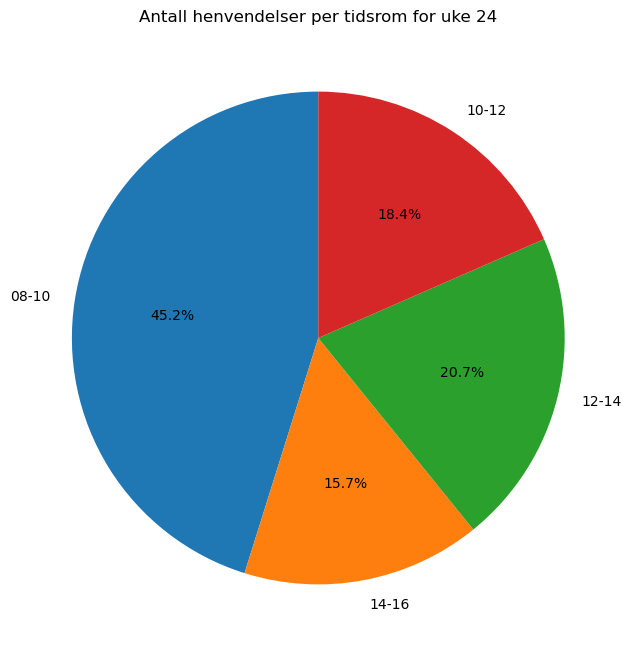

In [95]:
# kategorisere klokkstlett
def kategoriser_tid(tid):
    if 8 <= tid < 10:
        return "08-10"
    elif 10 <= tid < 12:
        return "10-12"
    elif 12 <= tid < 14:
        return "12-14"
    elif 14 <= tid < 16:
        return "14-16"
    else:
        return "Utenfor arbeidstid" 

# Konverter klokkeslettene til tidsrom
tidsrom = [kategoriser_tid(int(k.split(":")[0])) for k in kl_slett]

# Finn antall henvendelser per tidsrom
hendelser_per_supportvakt = {tid: tidsrom.count(tid) for tid in set(tidsrom)}
print(hendelser_per_supportvakt)

#Definerer rekefølge for tidsrommene
rekkefølge = ["08-10", "14-16", "12-14", "10-12"]

# sektordiagram 
labels = [tid for tid in rekkefølge if tid in hendelser_per_supportvakt]
sizes = [hendelser_per_supportvakt[tid] for tid in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Antall henvendelser per tidsrom for uke 24')
plt.show()




## Del f) Kundens tilfretshet i henhold til NPS-systemet 

In [109]:
# kolonne for tydelighet
kolonne_tilfredshet = "Tilfredshet"

# Start fra originalt datasett med alle kolonner
df_clean = df_orginal.copy()

# Konverter til numerisk og håndter ugyldige verdier
df_clean[kolonne_tilfredshet] = pd.to_numeric(df_clean[kolonne_tilfredshet], errors="coerce")

# Fjerner NaN verdier
df_clean = df_clean.dropna(subset=[kolonne_tilfredshet])

# Konverter til heltall
df_clean[kolonne_tilfredshet] = df_clean[kolonne_tilfredshet].astype(int)

# Tell antall kunder i hver kategori
antall_kunder = len(df_clean)
antall_negative = len(df_clean[df_clean[kolonne_tilfredshet] <= 6])
antall_noytrale = len(df_clean[(df_clean[kolonne_tilfredshet] >= 7) & (df_clean[kolonne_tilfredshet] <= 8)])
antall_positive = len(df_clean[df_clean[kolonne_tilfredshet] >= 9])

# Beregn prosentandelene
prosent_negative = (antall_negative / antall_kunder) * 100
prosent_positive = (antall_positive / antall_kunder) * 100

# Beregn NPS
NPS = prosent_positive - prosent_negative

# Skriv ut resultatet
print("🔸 Supportavdelings NPS 🔸")
print(f"Totalt antall kunder med tilbakemelding: {antall_kunder}")
print(f"Negative (1-6): {antall_negative} ({prosent_negative:.2f}%)")
print(f"Nøytrale (7-8): {antall_noytrale}")
print(f"Positive (9-10): {antall_positive} ({prosent_positive:.2f}%)")
print(f"\n🔹 Net Promoter Score (NPS): {NPS:.2f}")

🔸 Supportavdelings NPS 🔸
Totalt antall kunder med tilbakemelding: 43
Negative (1-6): 10 (23.26%)
Nøytrale (7-8): 5
Positive (9-10): 28 (65.12%)

🔹 Net Promoter Score (NPS): 41.86
